# Linear Regression 

In this tutorial, you will learn more about Linear Regression, and will learn how to train a single, and a multiple linear regression models. More specifically, this tutorial will also show you how to 

* Load dataset from a file (**.csv**)

* Prepare data as a set of input features and target variable (response variable) to be ready for modelling  
* Create and training a linear regression model, make predictions and evaluate the model’s performance 
* You will learn more about `pandas`, `seaborn`, and other Python hacks in this document.
* Finally, you will learn about new tool in Python (`streamlit`) that allows you to create front-end easily

**Problem**: Our task for today is simple, a company is investing money in advertisements at TV, Radio and Newspaper. We want to build a model that can predict the increase of sales units, given investing certain units of money in the above media!


In [1]:
# import required variables
import pandas as pd 
import numpy as np
# sklearn for ML models 
from sklearn.linear_model import LinearRegression

## Load /Explore data 

**Data: **First thing is to explore what data related to the problem is available. Then, we should be doing a lot of data preparation, exploration, and pre-processing before making it read a learning algorithm. But in this tutorial, we will keep it simple. 

* First, we will load the file and view the first 10 rows 
* Notice that  the file `Adevrtising.csv` must be inside the `data` folder, or simply change the line of code below, if hte path is different

In [2]:
df = pd.read_csv('data/Adevrtising.csv')
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [3]:
df[:10]# same as df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [4]:
# Check number of columns and rows 
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 200 rows and 4 columns


* It is always good idea to explore the relation between the input features (TV, Radio, ...) and the response variable (Sales). We can do this using a simple visualisation
* We will use the `seaborn` visualization library (a powerful python library for visualisation)

In [5]:
import seaborn as sns
sns.set_style("darkgrid")
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=5, aspect=0.7)

## Simple Linear Regression 

Notice that we want to map $X$ to $Y$. In other words we want to use $TV$, to predict the increase in $Sales$. So, lets use one feature $TV$, and assume that our sales mainly depends on how much we spend on the $TV$ Advertisement. We will consider the two `coding` steps below are our main pre-processing work. However, this task is often more demanding than simply choosing a feature or two, there is a lot of work on features engineering and how to best select the most representative features. We will cover this in later weeks, for now, our Data Preparation approach is very simple:

### Data Preparation 

In [6]:
# create X and y
# columns/ features representing 'X'
feature_cols = ['TV']
X = df[feature_cols]
# what you want to learn predict
y = df.Sales

# lets check the type of the new constructs 
print(f'The type of X is {type(X)}')
print(f'The type of y is {type(y)}')

The type of X is <class 'pandas.core.frame.DataFrame'>
The type of y is <class 'pandas.core.series.Series'>


### Build the model (Linear Model)
* First, we create an instance of the class LinearRegression, which will represent the regression model
* Then we fit our data into the model
* With `.fit()` calculates the optimal values of the weights $B_0$ and $B_1$, ... using the existing input and output ($X$ and $y$) as the arguments. 
* Fitting the model is simple `model.fit(X,y)`eps are outlined below

In [7]:
# Initiate and fit
simple_lm = LinearRegression()
simple_lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* Remember, we want to learn the `weights` or the coefficients for our model $\hat{Y} = {\beta_0} + {\beta_1} X$ is an estimate of the regression equation which 

* So, lets first print these coefficients 

In [8]:
# print the coefficients
print ("iNTERCEPT : ",simple_lm.intercept_)
print ("CO-EFFICIENT : ",simple_lm.coef_)


iNTERCEPT :  7.032593549127695
CO-EFFICIENT :  [0.04753664]


### Interpreting Model Coefficients

Linear models are simple, and so the results / coefficients interpretation. Here we interept interpret the TV coefficient $({\beta_1})$? as follows:
 

* A **unit** increase in $TV$ advertisement spending is associated with an increase of **0.04753664** increase in $Sales$
* Notice that if the $TV$ advertisement spending is associated with **decrease** in sales, then you would find that the ${\beta_1}$ coefficient would be negative!


### Make Predictions

* Best and easiest way to test/ evaluate the model is to perform some predictions. In later weeks, we will discuss more about model evaluations. For now, lets see how can we use our model to perform the predictions for $Sales$ based on our only **feature** $TV$
* We suppose that we want invest the **230** in TV advertising, then using our model, we want to check how much sales this would generate



In [9]:
# prediction with sklearn
TV = 230
print(f'Investing {TV} in Tv and Generates {simple_lm.predict([[TV]])} in Sales')



Investing 230 in Tv and Generates [17.96602085] in Sales


* Check the predicted sales value against the actual value (see table above)
* Or you may want to select all records in your dataset where an investment of a value between 225 to 235 in $TV$ advertising being made, and check what was the actual increase units of $Sales$ to compare with your model
* Notice that this is not the way we should evaluate our model. But the code below is useful as it introduces more Python techniques.  


In [10]:
tv_230s = df.loc[(df['TV'] >= 225) & (df['TV'] <=235)] 
#the above returns all records of tv instment betwen 225 and 235

* Lets check the **average** increase in units sales based on investing on $TV$ advertisement according to your dataset

In [11]:
print(f'Mean sales increase {tv_230s.Sales.mean()}')

Mean sales increase 16.5375


* Another way to make predictions using your model, is using the `predict()` method which returns an numpy array of predicted values of sales. Recall, we called our model `simple_lm` 

In [12]:
predictions = simple_lm.predict(X)

* We can create a data frame to store actual sales values against the predicted sales values as below. This is always agood practices, even for further manual error analysis

In [13]:
df_eval = pd.DataFrame({'Actual': y, 'Predicted': predictions})
df_eval.head()

,Actual,Predicted
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218


* You can also **plot** the model and the actual points to get a visual insight about your model performance

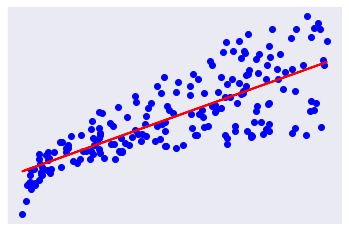

In [14]:
import matplotlib.pyplot as plt
# Plot outputs
plt.scatter(X, y,  color='blue')# actual values from the dataset
plt.plot(X, predictions, color='red', linewidth=2)# predicted values by the model

plt.xticks(())
plt.yticks(())

plt.show()

### Evaluation 

* The above steps can be considered as some way of evaluating the model and get better understanding on how it performs across different instances. However, a more common and easier approach is to use Python `sklearn` library and let it do the job for you. 
* The lines of code below compute the metrics (MAE, MSE, RMSE) that were discussed in the lecture. Recall, these are defined as follows:

 - Mean Absolute Error $MAE= \frac{1}{n}\sum_{i=1}^{n}|y-\hat{y}|$, where $y$ is the actual output and $\hat{y}$ is the predicted value  

 - Mean Squared Error $MSE= \frac{1}{n}\sum_{i=1}^{n}|y-\hat{y}|^2$, where $y$ is the actual output and $\hat{y}$ is the predicted value 
 
 - Root Mean Squared Error $RMSE=\sqrt{ \frac{1}{n}\sum_{i=1}^{n}|y-\hat{y}|^2}$, where $y$ is the actual output and $\hat{y}$ is the predicted value  





In [15]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, predictions)))

Mean Absolute Error: 2.549806038927486
Mean Squared Error: 10.512652915656757
Root Mean Squared Error: 3.2423221486546887


### Stats Model

* One final thing about linear regression. You can also use the stats library in Python. This does the same job, but easier to get the `p-value` through this library. This value is important as will be discussed shortly. 
* If not installed in your system, simply do so by `!pip install statsmodels`

In [16]:

import statsmodels.formula.api as sm

# create a fitted model (predict sales given tv investment)
lm1 = sm.ols(formula='Sales ~ TV', data=df).fit()
#  check the coefficients
print(lm1.params)


Intercept    7.032594
TV           0.047537
dtype: float64


In [17]:
# And also we can perform predictions same way 
# Lets check how much sales increase would be if we invest 230 in TV Adverts
X_new = pd.DataFrame({'TV': [230]})
# predict for a new observation
lm1.predict(X_new)


0    17.966021
dtype: float64

### Hypothesis Testing and p-values

When we aim at understanding how one feature influences the outcome (i.e. how TV spending increases/ decreases Sales), we start with what is called **null hypothesis** and an **alternative hypothesis**. Then check if our data supports / rejects one of them. 
* In our example, the **null hypothesis**: There is no relationship between $TV$ ads and Sales 
* And the **alternative hypothesis**: There is a relationship between TV ads and Sales
* But then, how do we test this hypothesis? The simplest way is to consider the **p-value**.  Consider the code below to get this value:

In [18]:
# print the p-values for the model coefficients
print(f'The p value is {lm1.pvalues}')

The p value is Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64


* A **p-value** less than **0.05** is one way to decide that there is likely a relationship between the feature and the response.! As shown in the results above the **p-value** for $TV$ feature is very small value, which indicates that there is relation between between the feature $TV$ and the response $Sales$. You can re-print the p-value in a non-scientific format as below



In [19]:
a = 1.467390e-42
output = f"{a:.50f}"
print('The p-value is ',output)

The p-value is  0.00000000000000000000000000000000000000000146739000


## Multiple Linear Regression
 

* Similar to single/ simple linear regression. We also want to map $X$ to $Y$, but $X$ here is representing more than one input feature in your dataset. 
* Recall also that we have input features ($X$), and Response variable (dependent varialble), the code below subsets the original dataset into two sperate sets



In [20]:
# prepare the data 
X = df[['TV','Radio','Newspaper']]
y = df['Sales']


* Then just as we did above, we firt, create an instance of the class LinearRegression, which will represent the regression model:

In [21]:
model = LinearRegression()

* Fit the model using the `fit()` method and print the coefficients

In [22]:
model.fit(X, y)
# print  the coefficients
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)


Intercept: 
 2.938889369459412
Coefficients: 
 [ 0.04576465  0.18853002 -0.00103749]


* You may want to print the coefficients in a better format (i.e. Data Frame)

In [23]:
model_coeffs = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
model_coeffs

,Coefficient
TV,0.045765
Radio,0.188530
Newspaper,-0.001037


* To make predictions, we need to input three features in this case $TV$, $Radio$ and $Newspapers$ representing advertisement spending in these media

In [24]:
# prediction with sklearn
TV = 2.75
Radio = 5.3
Newspaper = 1000
print(f'Investing {TV} in Tv and {Radio} in Radio and {Newspaper} in Newspaper \
                \n will generate {model.predict([[TV, Radio, Newspaper]])}')



Investing 2.75 in Tv and 5.3 in Radio and 1000 in Newspaper                 
 will generate [3.02645819]


* Lets predict sale values for all the dataset, and find the results 

In [25]:
predictions = model.predict(X)
print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, predictions)))

Mean Absolute Error: 1.252011229687068
Mean Squared Error: 2.784126314510936
Root Mean Squared Error: 1.6685701407225697


* You can also make manual predictions as done before, recall that our model is in the form of $B_{0}$+$B_{1}X_1$+,...+$B_nX_n$=$\hat{y}$

In [26]:
new_sales = 2.938889369459412+ (0.04576465*TV) +  (0.18853002*Radio)  -(0.00103749*Newspaper)

In [27]:
print(f'The new Sales value is {new_sales}')

The new Sales value is 3.026461262959412


## Note about Linear Models 

Linear regression models are common, and good way to get some insights about your data. However, they are rarely used as a prediction model (as we did here). This is simply, because most problems are non-linear. Therefore, other models should be considered. Even with a simple plot as shown below, we can see that this relation between spending on certain media ads and the increase in sales is always existing.





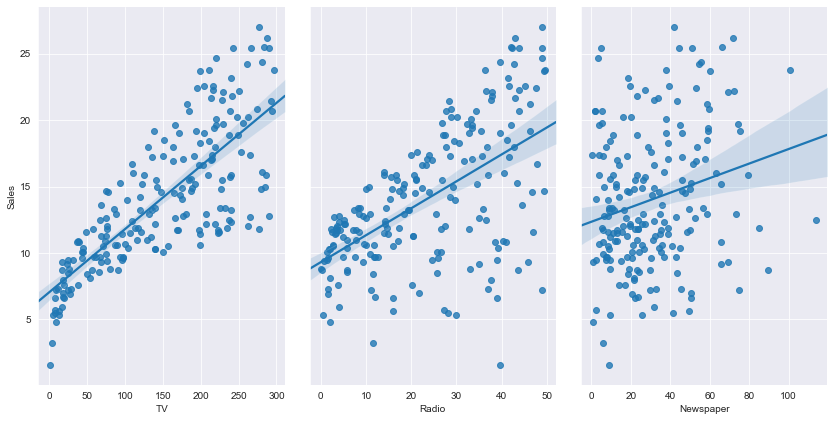

In [28]:
# plot tv, radio and newspapers against sales 
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=6, aspect=0.657, kind='reg')

## Streamlit

Streamlit is a great new tool (python library) that enables you to quickly build and interactive web application based on your data. In this part of the tutorial we will be using `streamlit` to create a simple front-end that enables the users to perform predictions. Our model in this case is represented by the coefficients that we learnt from our Linear Model. Therefore, we will design our solution so that users input the number of units they want to spend on $TV$, $Radio$ and so on. Then, the increase in sales will be predicted (see manual predictions above). 

https://docs.streamlit.io/en/stable/tutorial/index.html


### Setup 

Preparing your environment to use streamlit is as simple as the following two lines of code below. In other words, you just need to ensure that `streamlit` is installed like any other python library. Notice, that the commands below are commented because I already have `streamlit` installed. So you only issue this once. 




In [29]:
'''
!pip install streamlit
!streamlit hello
'''

'\n!pip install streamlit\n!streamlit hello\n'

### Your First Application 

In order to run streamlit, first you need to create your Python code and save it in a file (**.py**). And lets call it **myapp.py**. You can use Jupyter or a text editor to create the file. On campus moodle module's page, you will find **myapp.py**, you can download it, ensure that you also download the **Advertising.csv** file, and then run the app from your command line using the command below:  

\$ `streamlit run` **myapp.py**. 

Explore the code in the file. You will notice that is is just python code: 

In [261]:
# import required libraries 
import streamlit as st #**
import numpy as np
import pandas as pd

The second step, we created a title for the application:
`st.title('Adevrtising-Sales')`


Notice some of the important key features within streamlit that were used to add some text into the front pages and customised messages to users:
* `streamlit.markdown( )` allows you to also add markdown into the screen 
* `streamlit.info( )`, you can show a message to the user
* `streamlit.write( )` allows you to write some text

Adding check boxes, radio buttons, sliders, etc... are all simple to do, below is a simple example from our file to add a check box. Notice, that once this button is checked, few records of the data frame will be displayed. 

`show_df = st.checkbox('Explore the Dataset',False)`

Another key feature is the streamlit cache. In the code below, we cached the `get_data()` function, because we don't want to read the data every time, we change something in the app 

`@st.cache
def get_data():
    df = pd.read_csv('data/Adevrtising.csv')
    return df`


**Note**: One very nice feature about working with `streamlit`, is that once you run the application, you can open your  your **.py** file in any text editor , along side the web app, and any changes to do to the code, once you save it, you will instantly see the results (more about this in the lab). 



## Lab Exercise 

* One thing that hasn't been done in the above tutorial is to test the model's on unseen data. In other words, we have trained our model using the dataset in the dataframe, and evaluated its performance using the same data. This doesn’t guarantee that our model will perform well on unseen data

* In machine learning, to ensure that our model can generalise to new data, we often split the dataset into two subsets, `training` set, where we used 70 or 80% of the data, and the remaining for the `testing` set. We then use the training set to train our model, once done, we use the testing set to validate the models performance. 



### Train-Test Data


In this task, you will split the dataset into training set (of 80% of the records), and testing set for the remaining. The code below should help you do the task.



A simple way split the dataset into training and testing sets can be as follows:

In [57]:
# first compute the 80% size of the data
train_size = int(.8 * df.shape[0])# cast to intger
print (f'80% of the {df.shape[0]} is {train_size}')

80% of the 200 is 160


In [54]:
# using slicing to create two data frames as below 
train_df = df[:train_size]
test_df  = df[train_size:]

In [60]:
# Check if the total size of both train and test = the original size 
if ((train_df.shape[0]+test_df.shape[0]) == df.shape[0]):
    print('Split is correct')
    

Split is correct


### Train the Model 

Now, you need to create your Linear Regression Model (as we did above) and train it using the `train_df` dataset. Once complete, make sure you perform predictions, and compute the main evaluation metrics as we did, these include MAE, MSE, and RMSE. 

### Test the Model

Finally, you will need to use your model to perform predictions on the `test_df` dataset. Again, here you need to compute the above metrics for evaluation. Then compare performance on of the model on both training and testing set.

**Note**: A more common way we use to split the data is using the  `sklearn.model_selection.train_test_split(*arrays, **options)` to split the data into two sets for you. But the above method should do for this taks. 
    

## Reproducible Work 

Everything you saw in this document was produced using Jupyter Notebook. It contains `code` and just normal text that explains what is going on. The text, math formulas, and other stuff you saw is created inside the Mardown Cells of the Notebook. Notice, that with Jupyter cells have different types, such as Code, Markdown, and others. 

Once the Notebook is finished, it can be saved and also can be downloaded as PDF file. You can also download it as a Latex file (source code), which can then be edited using Latex Editor or the online Editor  https://www.overleaf.com/. You can find more about markdown at this link https://daringfireball.net/projects/markdown/.

It is **important** that you develop basic understanding of Jupyter Notebook, and Markdown. You need to prepare your Coursework as a reproducible document, just like this one, with appropriate structure, discussion, and the code that produced the results. More about this in the Lab demos. 

